In [29]:
import pandas as pd         
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

In [30]:
data_path = "/kaggle/input/gene-expression-cancer-rna-seq/TCGA-PANCAN-HiSeq-801x20531/TCGA-PANCAN-HiSeq-801x20531/data.csv"
labels_path = "/kaggle/input/gene-expression-cancer-rna-seq/TCGA-PANCAN-HiSeq-801x20531/TCGA-PANCAN-HiSeq-801x20531/labels.csv"

X_full = pd.read_csv(data_path)
y = pd.read_csv(labels_path)['Class']

X = X_full.drop(columns=['Unnamed: 0'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (640, 20531)
Test shape: (161, 20531)


In [31]:
model = LogisticRegression(
    max_iter=2000,          
    multi_class='multinomial',  
    solver='lbfgs',         
    random_state=42
)

model.fit(X_train, y_train)

print("Model trained!")

Model trained!


In [32]:
y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {acc:.4f} ({acc*100:.2f}%)")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.9938 (99.38%)
F1-score: 0.9938


<Figure size 800x600 with 0 Axes>

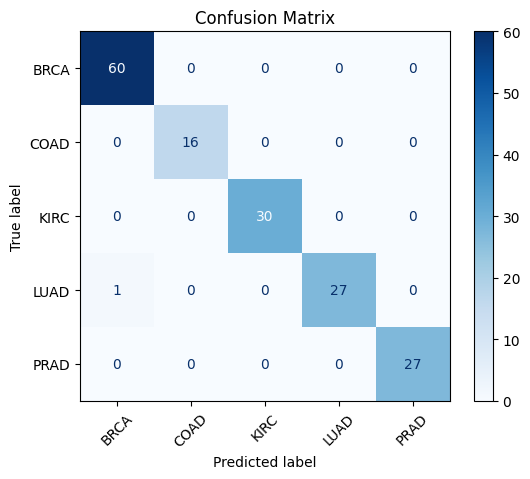

In [33]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

# Nice plot
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=model.classes_
)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.xticks(rotation=45)
plt.show()

## Logistic Regression Baseline

- Full scaled features (20,531 genes)
- Test set: 161 samples
- Accuracy: 0.9938 (99.38%)
- F1-score: 0.9938

Model is almost perfect — only 1 mistake (1 LUAD predicted as BRCA).

Surprisingly strong for baseline! Gene patterns separate cancers very well.  
Next: PCA to reduce features + compare with SVM, RF, ANN.